Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-205.01,-214.642,1.87017e-62
2,140.151,4.0,-202.236,-211.853,3.04061e-61
3,140.302,4.0,-199.49,-209.093,4.80482e-60
4,140.452,4.0,-196.772,-206.361,7.37957e-59
5,140.603,4.0,-194.083,-203.658,1.1016e-57
6,140.754,4.0,-191.422,-200.983,1.59828e-56
7,140.905,4.0,-188.79,-198.337,2.25382e-55
8,141.055,4.0,-186.186,-195.719,3.08905e-54
9,141.206,4.0,-183.611,-193.13,4.11497e-53


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,154.925,5.60804,-64.084,-72.5763,0.933389
2,154.925,6.97487,-64.4792,-72.9715,0.628647
3,155.226,7.53769,-65.0179,-73.4929,0.373235
4,157.186,6.09045,-65.5604,-73.9286,0.2414
5,154.623,8.26131,-65.7834,-74.2932,0.167652
6,155.075,4.96482,-64.7681,-73.2517,0.475025
7,156.884,5.04523,-66.3162,-74.7003,0.11159
8,153.869,5.76884,-64.2867,-72.8413,0.716107
9,154.472,4.48241,-65.9913,-74.5099,0.134991


### Snippet 4.23

Density of sigma

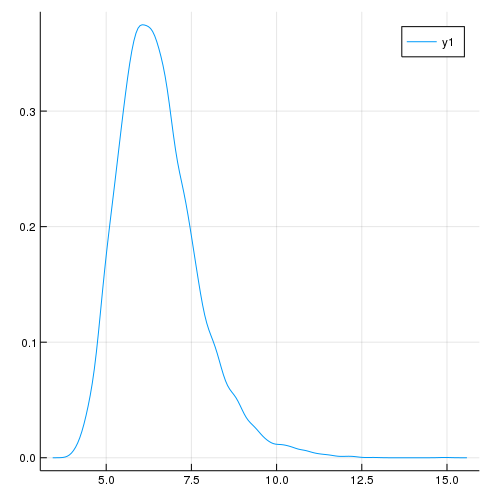

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*